# Sub Sampling Data Genome SARS-CoV-2

---

_oleh: Matin Nuhamunada, M.Sc._

Department of Tropical Biology, Universitas Gadjah Mada;   
Jl. Teknika Selatan, Sekip Utara, Bulaksumur, Yogyakarta, Indonesia, 55281;   

email: [matin_nuhamunada@ugm.ac.id](mailto:matin_nuhamunada@mail.ugm.ac.id)  

---
#### Notebook Links
* 1. [Sub-sampling data genome SARS-CoV-2](01_sub-sampling.ipynb) (notebook ini)
* 2. [Analisis _genomic epidemiology_ dengan menggunakan Nextstrain](02_analysis.ipynb)
* 3. [Koleksi spike gene per clade](03_clade_s_gene_analysis.ipynb)

## Deskripsi
Pada notebook ini, dilakukan sub sampling data sekuen genom SARS-CoV-2 dari database [GISAID](https://www.gisaid.org/) supaya dapat dilakukan analisis lebih lanjut dengan menggunakan _personal computer_. 

Data disimpan pada directory /data:
* [data/sequences.fasta](data/sequences.fasta)
* [data/metadata.tsv](data/metadata.tsv)

Kedua file ini diunduh pada tanggal 9 Mei 2020

![Unduh data dari GISAID](https://raw.githubusercontent.com/nextstrain/ncov/master/docs/images/gisaid_downloads.png)
Panduan untuk mempersiapkan data dan melakukan analisis dengan nextstrain dapat diakses di: https://github.com/nextstrain/ncov/blob/master/docs/running.md

## Exploratory Data Analysis

In [1]:
# Load Library
import pandas as pd

* Selanjutnya, kita akan membuka file metadata.tsv untuk melihat sampel genome SARS-CoV-2 yang tersedia. Tim nextstrain juga telah menyediakan daftar sampel yang di "exclude" pada: https://github.com/nextstrain/ncov/blob/master/config/exclude.txt.

* Untuk mempermudah analisis selanjutnya, unduh semua konten dari https://github.com/nextstrain/ncov/blob/master/config/ ke folder config.

In [12]:
# open metadata.tsv
df_raw1 = pd.read_csv("data/metadata.tsv", sep='\t')

# open data to be excluded from config/exclude.txt
exclude = pd.read_csv('config/exclude.txt', sep="/t", header=None)

# drop excluded data
drop = []
for i in exclude.index:
    if exclude.loc[i].str.startswith("#").values[0]:
        drop.append(i)
exclude = exclude.drop(drop)
df_raw = df_raw1[~df_raw1.strain.isin(exclude[0])]

# show dataframe
df_raw

/home/matin_nuhamunada/miniconda3/envs/nextstrain/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


,strain,virus,gisaid_epi_isl,genbank_accession,date,region,country,division,location,region_exposure,...,length,host,age,sex,originating_lab,submitting_lab,authors,url,title,date_submitted
0,Algeria/G0638_2264/2020,ncov,EPI_ISL_418241,?,2020-03-02,Africa,Algeria,Boufarik,NaN,Africa,...,29862,Human,28,Female,NIC Viral Respiratory Unit - Institut Pasteur ...,National Reference Center for Viruses of Respi...,Albert et al,https://www.gisaid.org,?,2020-03-29
1,Algeria/G0640_2265/2020,ncov,EPI_ISL_418242,?,2020-03-08,Africa,Algeria,Blida,NaN,Africa,...,29867,Human,87,Male,NIC Viral Respiratory Unit - Institut Pasteur ...,National Reference Center for Viruses of Respi...,Albert et al,https://www.gisaid.org,?,2020-03-29
2,Algeria/G0860_2262/2020,ncov,EPI_ISL_420037,?,2020-03-02,Africa,Algeria,Boufarik,NaN,Africa,...,29862,Human,41,Male,NIC Viral Respiratory Unit - Institut Pasteur ...,National Reference Center for Viruses of Respi...,Albert et al,https://www.gisaid.org,?,2020-04-04
3,Anhui/SZ005/2020,ncov,EPI_ISL_413485,?,2020-01-24,Asia,China,Anhui,Suzhou,Asia,...,29860,Human,58,Male,"Department of microbiology laboratory,Anhui Pr...","Department of microbiology laboratory,Anhui Pr...",Li et al,https://www.gisaid.org,?,2020-03-05
4,Argentina/C121/2020,ncov,EPI_ISL_420600,?,2020-03-07,South America,Argentina,Argentina,NaN,South America,...,29903,Human,51,Male,Servicio Virosis Respiratorias-Departamento Vi...,Instituto Nacional Enfermedades Infecciosas C....,Baumeister et al,https://www.gisaid.org,?,2020-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17524,hCoV-19/Israel/CVL-n6196/2020,ncov,EPI_ISL_435286,?,2020-03,Asia,Israel,Israel,NaN,Asia,...,29903,Human,55,Female,"Central Virology Laboratory, Israel Ministry o...","Central Virology Laboratory, Israel Ministry o...",eta Zuckerman et al,https://www.gisaid.org,?,2020-05-04
17525,hCoV-19/Israel/CVL-nL19/2020,ncov,EPI_ISL_435289,?,2020-03,Asia,Israel,Israel,NaN,Asia,...,29903,Human,41,Female,"Central Virology Laboratory, Israel Ministry o...","Central Virology Laboratory, Israel Ministry o...",Zuckerman et al,https://www.gisaid.org,?,2020-05-04
17526,hCoV-19/Israel/CVL-nL33/2020,ncov,EPI_ISL_435292,?,2020-03,Asia,Israel,Israel,NaN,Asia,...,29903,Human,61,Female,"Central Virology Laboratory, Israel Ministry o...","Central Virology Laboratory, Israel Ministry o...",Zuckerman et al,https://www.gisaid.org,?,2020-05-04
17527,mink/Netherlands/1/2020,ncov,EPI_ISL_431778,?,2020-04-24,Europe,Netherlands,Milheeze,NaN,Europe,...,29880,Mustela lutreola,?,?,unknown,"Virology, Wageningen Bioveterinary Research",Oreshkova et al,https://www.gisaid.org,?,2020-04-27


* Sebelum melakukan analisis lebih jauh, kita perlu mengeksplorasi data terlebih dahulu. Disini dapat kita lihat bahwa tidak semua sampel berasal dari manusia

* Kita juga ingin melihat persebaran geografis sampel. Terdapat 4 region dengan sampel genome terbanyak, yaitu: Europe, North America, Oceania, dan Asia

Human                       17300
Environment                     8
Panthera tigris jacksoni        1
Canine                          1
Mustela lutreola                1
unknown                         1
Felis catus                     1
Name: host, dtype: int64


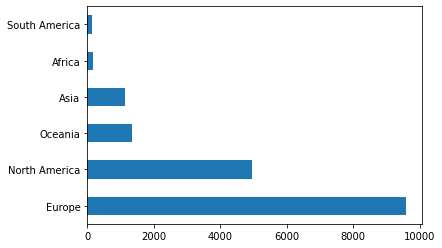

In [3]:
print(df_raw.host.value_counts())
df_raw.region.value_counts().plot.barh()

## Data Filtering: Human Samples & Local Transmission
Pada analisis ini, filtering dilakukan dengan kategori:
* Sampel yang digunakan hanya berasal dari 4 region utama
* Sampel berasal dari manusia
* Sampel berasal dari local transmission, dimana sampel region = sampel region exposure

In [5]:
filter = list(df_raw.region.value_counts().index[0:4])
df_filter = []
for i in filter:
    df = df_raw[(df_raw.host == "Human") & (df_raw.region == i) & (df_raw.region_exposure == i) & (df_raw.length.values >= 25000)]
    df_filter.append(df)
df_filter = pd.concat(df_filter)
print(df_filter.region_exposure.value_counts())

Europe           9541
North America    4910
Oceania          1342
Asia             1081
Name: region_exposure, dtype: int64


## Random Sub Sampling dari tiap Region
* Dilakukan sub sampling dengan n=100 untuk tiap region
* Memastikan bahwa semua sampel dari Indonesia masuk ke dataset

In [13]:
# 2nd filter, for each region (Europe, NA, Oceania, Asia), take 100
n_sample = int(100)
df_sample = []
for x in filter:
    df = df_filter[df_filter.region ==x]  
    df2 = df.sample(n=n_sample, random_state=1)
    df_sample.append(df2)
df_sample = pd.concat(df_sample)

# add sample from Indonesia
df_id = df_filter[df_filter.country == "Indonesia"] 
df_sample = pd.concat([df_sample, df_id])
df_sample.country.value_counts()

Australia               100
USA                     100
United Kingdom           68
China                    49
India                    12
Indonesia                10
Singapore                 9
Hong Kong                 7
Netherlands               6
Georgia                   4
France                    4
Thailand                  4
Luxembourg                3
Jordan                    3
Taiwan                    3
Brunei                    2
South Korea               2
Spain                     2
Philippines               2
Hungary                   2
Denmark                   2
Iceland                   2
Sweden                    2
Russia                    1
Czech Republic            1
Austria                   1
Turkey                    1
Japan                     1
Belgium                   1
Finland                   1
Norway                    1
United Arab Emirates      1
Portugal                  1
Germany                   1
Name: country, dtype: int64

## Membuat file exclude untuk analisis dengan Augur
* Hasil sub sampling dapat dilihat pada file [metadata_subsampling.txt](results/metadata_subsampling.txt)
* File [exclude_subsampling.txt](config/exclude_subsampling.txt) akan digunakan pada analisis selanjutnya

In [8]:
# create result directory
! mkdir -p results

df_exclude = df_raw1[~df_raw1.index.isin(df_sample.index)]
df_exclude.strain.to_csv('config/exclude_subsampling.txt', header=False, index=False, sep='\t')

#df_sample.strain.to_csv('config/include_subsampling.txt', header=False, index=False, sep='\t')
df_sample.to_csv('results/metadata_subsampling.csv')

## Next
[Analisis _genomic epidemiology_ dengan menggunakan Nextstrain](02_analysis.ipynb)